In [364]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#TODO: kolommen van int omzetten naar "Int64" zodat np.nan kan worden opgeslagen ipv 0 als placeholder 

# In hoeverre is het mogelijk om de budget-winst verhouding te voorspellen?
Ook voor deze onderzoeksvraag zullen de zeven stappen van het Data Science-proces worden toegepast. 
Stappen 1, 2 en 3 zullen in grote maten hetzelfde zijn als bij de overige twee onderzoeksvragen.
### Het Data Science-proces
1. Data collection
2. Data processing (ook wel data munging)
3. Data cleaning
4. Data exploration & analysis
5. Model building
6. Visualization
7. Communication

## 1. Data Collection
Voor het beantwoorden van deze onderzoeksvraag zal alleen gebruik worden gemaakt van `movie.csv`.
Om te zien of de dataset `movie.csv` goed is ingeladen, worden de eerste vijf rijen getoond:

In [365]:
df_movies = pd.read_csv('../../data/movie.csv')
df_movies.head()
print(f"In totaal zijn er {len(df_movies)} films.")

In totaal zijn er 5043 films.


Te zien is dat de data goed wordt ingelezen en de waardes in de juiste kolommen komen te staan.

## 2. Data Processing
Ook deze stap is grotendeels voor ons gedaan. De data is goed opgeslagen in een `.csv`-bestand
en kan direct worden opgeslaan als een _Pandas_ DataFrame.

Verder rest ons nog de volgende drie stappen:
1. Het selecteren van de gewenste kolommen
2. Het aanpassen van onduidelijke kolomnamen
3. Het aanpassen van de datatypen

In [366]:
# Selecteren gewenste kolommen
df_movies = df_movies[["movie_title", "budget", "gross", "title_year"]]

#Onduidelijke kolomnamen aanpassen
df_movies.rename(columns={'movie_title': 'Movie title',
                          'budget': 'Budget',
                          'gross': 'Gross',
                          'title_year': 'Release year'}, inplace=True)

# Datatypen aanpassen: Floats naar integers omzetten
df_movies.fillna(0, inplace=True)
df_movies = df_movies.astype({"Budget": int, "Gross": int})


# Datatypes aanpassen: De kolom `Release year` omzettten van integers naar het datetime-datatype
df_movies["Release year"] = pd.to_datetime(df_movies["Release year"], format='%Y', errors='coerce')

Het DataFrame `df_movies` ziet er nu als volgt uit:

In [367]:
df_movies.head()

,Movie title,Budget,Gross,Release year
0,Avatar,237000000,760505847,2009-01-01
1,Pirates of the Caribbean: At World's End,300000000,309404152,2007-01-01
2,Spectre,245000000,200074175,2015-01-01
3,The Dark Knight Rises,250000000,448130642,2012-01-01
4,Star Wars: Episode VII - The Force Awakens ...,0,0,NaT


Alle kolommen van het DataFrame hebben nu het juiste datatype.
`Budget` en `Gross` bestaan uit integers en `Release year` bestaat uit het `datetime` datatype.

## 3. Data Cleaning
1. Het verwijderen van NaN-types
2. Het verwijderen van dubbele `Movie titles`
3. Het omzetten van negatieve en absurde waardes naar 0
4. Het verwijderen van rijen met een budget van 0

In [368]:
# NaN-types verwijderen uit de titels
df_movies.dropna(inplace=True)
print(f"In totaal zijn er {len(df_movies)} films die een titel hebben.")

# Dubbele titels verwijderen
df_movies.sort_values("Release year", inplace=True)  # Sorteren op uitgavejaar
df_movies.drop_duplicates(subset="Movie title", keep="last", inplace=True)  # Alleen meest recente versie blijft bewaard
print(f"In totaal zijn er {len(df_movies)} films zonder duplicaten over.")

# Negatieve waardes omzetten
print(f"In totaal zijn er {df_movies[['Budget', 'Gross']].lt(0).sum().sum()} films met een negatief Budget of Gross.")
print(f"In totaal zijn er {df_movies[['Budget', 'Gross']].gt(2_800_000_000).sum().sum()} films met een hogere opbrengst dan de meest succesvolle film ooit.")

neg = df_movies._get_numeric_data()
neg[neg < 0] = 0
# Credits: stackoverflow.com/questions/27759084/how-to-replace-negative-numbers-in-pandas-data-frame-by-zero

# Verwijderen films met budget van 0
df_movies = df_movies[(df_movies[['Budget', 'Gross']] != 0).all(axis=1)]

In totaal zijn er 4935 films die een titel hebben.
In totaal zijn er 4811 films zonder duplicaten over.
In totaal zijn er 3 films met een negatief Budget of Gross.
In totaal zijn er 0 films met een hogere opbrengst dan de meest succesvolle film ooit.


Na stap 3. Data Cleaning ziet het DataFrame er als volgt uit:

In [369]:
df_movies.head()

,Movie title,Budget,Gross,Release year
4958,Over the Hill to the Poorhouse,100000,3000000,1920-01-01
2734,Metropolis,6000000,26435,1927-01-01
4812,The Broadway Melody,379000,2808000,1929-01-01
4786,42nd Street,439000,2300000,1933-01-01
4706,Top Hat,609000,3000000,1935-01-01


Het DataFrame is nu volledig opgeschoont. Beargumentering van de werkwijze:  
Aangezien nan-types niet kunnen worden opgeslagen in een kolom met het datatype `integer`
zullen met stap 1 van de datacleaning alleen alle nan-types van de kolom `Movie title` worden verwijderd*.    
*Bron: pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

Het omzetten van alle absurde waardes van `Budget` en `Gross` dienen mede hierdoor te worden omgezet naar `0`
alvorens deze rijen kunnen worden gedropped. Absurde waardes van `Budget` en `Gross` zijn alle
negatieve waardes. Andere absurde waardes zijn films met een `Budget` en/of `Gross` van meer dan
2.8 miljard. Er is immers nog nooit een film* geweest die meer dan 2.8 miljard opbracht.  
Zodra alle absurde waardes omgezet zijn naar `0` worden deze uit de dataset gefilterd.
*Bron: nl.wikipedia.org/wiki/Lijst_van_succesvolste_films 

Door het DataFrame eerst te sorteren op `Release year` en vervolgens de laatste waarde te behouden wordt
de meest recente uitgave van een film bewaard. Te zien is dat maar liefst (4935-4811=) 124 films dubbel
in de dataset voorkwamen.


## 4. Data Exploration & Analysis

Nu de data geprepareerd is kunnen wij onze eerste verkenning gaan uitvoeren. Door middel van describe krijgen we
in een oogopslag een duidelijk beeld van het DataFrame `df_movies`. 

In [370]:
df_movies.describe(include = "all")

,Movie title,Budget,Gross,Release year
count,3786,3.786000e+03,3.786000e+03,3786
unique,3786,NaN,NaN,75
top,The Last Stand,NaN,NaN,2002-01-01 00:00:00
freq,1,NaN,NaN,189
first,NaN,NaN,NaN,1920-01-01 00:00:00
last,NaN,NaN,NaN,2016-01-01 00:00:00
mean,NaN,3.914100e+07,5.024397e+07,NaN
std,NaN,6.267147e+07,6.873808e+07,NaN
min,NaN,2.180000e+02,1.620000e+02,NaN
25%,NaN,9.500000e+06,6.572147e+06,NaN


Enkele verwachtingen:
1. Een film heeft waarschijnlijk meer Facebook likes dan de director.
2. De meeste films zullen winst maken
3. Het meerendeel van de films zullen in het Engels zijn
4. Comedie en Actie zullen waarschijnlijk de meest voorkomende genres zijn.

Testen van de verwachtingen:
1. Gemiddeld heeft een film meer dan 10x zoveel likes dan een director.
2. Gemiddeld brengt een 40 miljoen op en is er een budget van 30 miljoen voor. Echter heeft de opbrengst een
standaard deviatie van 65 miljoen en het budget een standaard deviatie van 79 miljoen. Een goede conclusie is nog niet te geven.
3. 93.3% van de films zijn in het Engels. Dit is een ruime meerderheid.
4. Tegen de verwachtingen in is `Drama` het meest voorkomende genre met 229 maal. Echter valt hier ook nog niks over 
te zeggen omdat veel films meerdere genres bevatten.

Enkele overige observaties:
- Het DataFrame bevat nog 4811 (95.4%) van de originele 5043 rijen 
- `Movie title` bevat zoals beoogd alleen maar nog unieke waarden.
- De gemiddelde IMDB Score van een film is 6.5 met een standaard deviatie van 1.1. De laagste en hoogste scores zijn 1.6 resp. 9.3.
- Het DataFrame bevat films die uitgegeven zijn tussen 1916 en 2016. Een interval van 100 jaar.
- `Actor 3` bestaat uit de meest (3450) verschillende acteurs, gevolgd door `Actor 2 (2962)`en als laatste `Actor 1 (2042)`.

De volgende plots zijn slechts voor de eerste analyse van de data. Uiteraard zullen deze nog uitgebreid en verbeterd worden
in de loop van het project. In de volgende scatterplot zijn het budget en de opbrengsten van films geplot. Te zien is dat 
de meeste films niet meer dan 200 miljoen hebben gekost en niet meer dan 400 miljoen opleveren. Enkele uitschieters daargelaten.

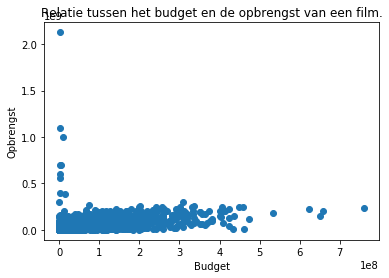

In [377]:
fig, ax = plt.subplots()
plt.title("Relatie tussen het budget en de opbrengst van een film.")
plt.xlabel("Budget")
plt.ylabel("Opbrengst")
scatter = ax.scatter("Gross", "Budget", data=df_movies)
plt.show()

In de volgende twee boxplots is de spreiding te zien van het budget en de opbrengsten van alle films. Te zien is dat 
het budget van films relatef minder is verspreid dan de opbrengst van de films. De boxplot van de opbrengsten heeft 
tevens veel meer uitschieters.

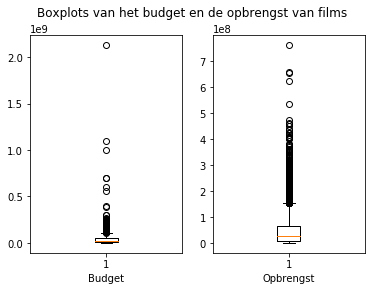

In [379]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.suptitle("Boxplots van het budget en de opbrengst van films")
ax1.set_xlabel("Budget")
ax1.boxplot(df_movies["Budget"])
ax2.set_xlabel("Opbrengst")
ax2.boxplot(df_movies["Gross"])
plt.show()
